In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 40.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.16MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.62MB/s]


In [ ]:
# 현재 작업 디렉토리에 있는 파일 및 폴더 목록을 출력
!ls
# → Colab 또는 Jupyter에서 사용하는 셀 명령어로, 현재 경로의 파일 목록을 보여줌
#   데이터가 잘 다운로드되었는지, 폴더가 생성되었는지를 확인할 수 있음

MNIST  sample_data


In [ ]:
# 훈련용 이미지 데이터셋을 출력
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
train_dataset.data[0]
# MNIST 훈련 데이터셋에서 첫 번째 이미지 데이터를 가져옴


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# torchvision에서 제공하는 MNIST 훈련 데이터셋을 불러온 후
# train_dataset.targets는 각 이미지에 대한 실제 정답(라벨)을 담고 있음

train_dataset.targets

# - 이 텐서는 총 60,000개의 요소를 가짐
# - 각 요소는 해당 이미지가 나타내는 숫자 (0~9)를 의미함
# - 예: train_dataset.targets[0] = 5 → 0번째 이미지는 숫자 '5'

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
# 훈련 데이터의 전체 구조 확인
train_dataset.data.shape
# → torch.Size([60000, 28, 28])
#   60,000개의 이미지, 각 이미지가 28x28 크기의 행렬 형태
#   CNN 모델 등에 입력하기 위한 기본 구조

torch.Size([60000, 28, 28])

In [ ]:
# 훈련 이미지에서 가장 큰 픽셀 값을 출력
train_dataset.data.max()
# → tensor(255, dtype=torch.uint8)
#   MNIST 이미지는 흑백이며, 픽셀 값은 0(검정)~255(흰색) 사이의 정수
#   이 값을 보면 정규화(0~1 사이 변환)가 필요한지 판단 가능

tensor(255, dtype=torch.uint8)

In [ ]:
# test size를 구하세요

# torchvision 라이브러리에서 MNIST 테스트 데이터셋을 다운로드 및 로드함
test_dataset = torchvision.datasets.MNIST(
    root='.',                        # 현재 디렉터리에 데이터 저장 또는 로드
    train=False,                    # False일 경우: 테스트용 데이터셋 로드 (10,000개 샘플)
    transform=transforms.ToTensor(),# 이미지 데이터를 torch.Tensor로 변환하고, 0~1 범위로 정규화
    download=True                   # 데이터가 없으면 인터넷에서 다운로드함
)

# test_dataset.data.shape
# → 테스트 데이터셋에 있는 이미지의 전체 크기(shape)를 반환
# - 10000개 이미지 (MNIST 테스트셋 기본 제공 개수)
# - 각 이미지 크기: 28 x 28 픽셀

In [ ]:
# 모델을 TENSORFLOW와 항상 비교

# PyTorch 모델 정의
model = nn.Sequential(
    nn.Linear(784, 128),  # 입력층: 784차원 → 은닉층: 128차원
    nn.ReLU(),            # 비선형 활성화 함수 ReLU
    nn.Linear(128, 10)    # 출력층: 128차원 → 클래스 10개 (MNIST: 0~9)
)

# TensorFlow/Keras 모델 정의
# model = Sequential([
#    Dense(128, input_shape=(784,)),  # 입력층: 784 → 은닉층: 128
#    ReLU(),                          # ReLU 활성화 함수
#    Dense(10)                        # 출력층: 클래스 10개
#])

In [ ]:
# 사용 가능한 장치가 CUDA(GPU)인지 확인하고, 그렇지 않으면 CPU 사용
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# cuda:0 또는 cpu 중 현재 선택된 디바이스가 출력됨
print(device)
# 모델을 선택한 디바이스(GPU 또는 CPU)로 이동
model.to(device)


cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# nn.CrossEntropyLoss()는 분류 문제에서 많이 사용하는 손실 함수(loss function)임
# 주로 여러 개 클래스 중에서 정답 클래스를 맞추는 문제에 사용
# 내부적으로는 소프트맥스(Softmax) 함수와 로그 손실(Log loss)을 결합한 형태로 작동
criterion = nn.CrossEntropyLoss()
# -> 모델 출력값(로짓)과 실제 정답 레이블(인덱스)을 비교해서 손실 값을 계산함

# torch.optim.Adam은 모델 학습을 위한 최적화 알고리즘(optimizer)임
# Adam은 확률적 경사 하강법(SGD)을 개선한 방식으로, 학습 속도와 성능 면에서 많이 사용됨
# model.parameters()는 학습 대상인 모델 내부의 모든 가중치(weight)와 편향(bias) 파라미터를 가져옴
optimizer = torch.optim.Adam(model.parameters())
# -> 이 optimizer가 모델 파라미터를 업데이트하면서 손실 값을 최소화하도록 학습을 진행함



In [ ]:
# 배치 크기 설정 (한 번에 모델에 넣을 데이터 개수)
batch_size = 128

# 학습용 데이터 로더: 데이터를 무작위(shuffle)로 섞어서 배치 단위로 불러옴
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

# 테스트용 데이터 로더: 무작위 섞지 않고(batch 순서대로) 배치 단위로 불러옴
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 임시 데이터 로더: 학습 데이터를 한 개씩 무작위로 불러오기 위해 사용
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)

# tmp_loader에서 데이터 하나만 가져와서 출력 (학습 데이터 확인용)
for x, y in tmp_loader:
  print(x)            # 입력 데이터
  print(x.shape)      # 입력 데이터의 크기 출력
  print(y.shape)      # 정답 라벨의 크기 출력
  break               # 첫 번째 배치만 확인하고 반복 종료


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# 학습

n_epochs = 10
train_losses = np.zeros(n_epochs)  # 각 에포크별 학습 손실값을 저장할 배열 초기화
test_losses = np.zeros(n_epochs)   # 각 에포크별 테스트 손실값을 저장할 배열 초기화

for epoch in range(n_epochs):
  model.train()  # 모델을 학습 모드로 전환 (드롭아웃, 배치 정규화 등 학습 전용 동작 활성화)
  train_loss = []  # 해당 에포크에서 계산한 학습 손실을 저장할 리스트 초기화

  for inputs, targets in train_loader:  # 학습 데이터 배치 단위로 반복
    # inputs: 이미지 배치, 크기 [128, 1, 28, 28] (배치크기 128, 채널 1, 28x28 픽셀)
    inputs = inputs.view(-1, 784)  # 28x28 이미지를 1차원 벡터(784)로 평탄화, 크기 [128, 784]

    outputs = model(inputs)  # 모델에 입력 데이터를 넣어 예측 결과 계산 (출력 크기: [128, 클래스수])
    loss = criterion(outputs, targets)  # 예측값과 실제값(정답) 사이 손실(loss) 계산 (CrossEntropyLoss 사용)

    optimizer.zero_grad()  # 이전 배치에서 계산된 기울기(gradient)를 초기화
    loss.backward()  # 손실값 기준으로 역전파 수행, 각 파라미터의 기울기 계산
    optimizer.step()  # 계산된 기울기로 모델 파라미터 업데이트 (학습 진행)
    train_loss.append(loss.item())  # 현재 배치의 손실값을 리스트에 저장

  model.eval()  # 모델을 평가 모드로 전환 (드롭아웃, 배치 정규화 등 평가 전용 동작 비활성화)
  test_loss = []  # 테스트 손실값 저장할 리스트 초기화

  for inputs, targets in test_loader:  # 테스트 데이터 배치 단위로 반복
    inputs = inputs.view(-1, 784)  # 테스트 입력도 동일하게 평탄화
    outputs = model(inputs)  # 모델 예측 수행
    loss_test = criterion(outputs, targets)  # 테스트 데이터에 대한 손실 계산
    test_loss.append(loss_test.item())  # 테스트 손실값 저장

  # 모든 배치의 대표값이 필요해서 학습과 테스트 손실의 평균값을 계산해 저장
  # 한 epoch에는 여러 개의 batch가 있음 (예: batch_size=128이면, MNIST의 60,000개 중 약 469개의 배치로 나뉨)
  train_losses[epoch] = np.mean(train_loss)
  test_losses[epoch] = np.mean(test_loss)


  print(f'Epoch {epoch+1}/{n_epochs}, Train_loss: {train_losses[epoch]:.4f}, Test_loss: {test_losses[epoch]:.4f}')


Epoch 1/10, Train_loss: 0.4107, Test_loss: 0.2212
Epoch 2/10, Train_loss: 0.1919, Test_loss: 0.1548
Epoch 3/10, Train_loss: 0.1393, Test_loss: 0.1292
Epoch 4/10, Train_loss: 0.1065, Test_loss: 0.1013
Epoch 5/10, Train_loss: 0.0864, Test_loss: 0.0927
Epoch 6/10, Train_loss: 0.0715, Test_loss: 0.0950
Epoch 7/10, Train_loss: 0.0600, Test_loss: 0.0847
Epoch 8/10, Train_loss: 0.0508, Test_loss: 0.0777
Epoch 9/10, Train_loss: 0.0433, Test_loss: 0.0739
Epoch 10/10, Train_loss: 0.0370, Test_loss: 0.0744


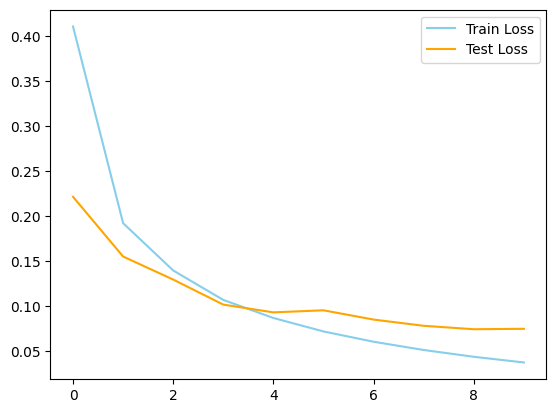

In [ ]:
plt.plot(train_losses, label='Train Loss', color='skyblue')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.legend()
plt.show()


In [ ]:
# 정확도 두 가지..

def compute_accuracy(loader):
  correct = 0
  total = 0
  with torch.no_grad():
    for inputs, targets in loader:
      inputs = inputs.view(-1, 784)
      outputs = model(inputs)
      values, predictions = torch.max(outputs, 1) # (최대값, 인덱스) 반환
      correct += (predictions == targets).sum().item()
      total += targets.size(0)

  return correct / total

train_acc = compute_accuracy(train_loader) # 469번 돌아감
test_acc = compute_accuracy(test_loader)

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")



Train Accuracy: 0.9926, Test Accuracy: 0.9777


In [ ]:
# confusin matrix 나는 틀렸네..왜 안나오니
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(loader, model):
  all_preds = []    # 모든 예측값 저장 리스트
  all_targets = []  # 모든 실제값 저장 리스트

  model.eval()
  with torch.no_grad():
    for inputs, targets in loader:
      inputs = inputs.view(-1, 784)          # 입력 평탄화
      outputs = model(inputs)                # 예측 수행
      _, preds = torch.max(outputs, 1)       # 예측 클래스 인덱스 반환

      all_preds.extend(preds.cpu().numpy())       # 예측값 저장
      all_targets.extend(targets.cpu().numpy())   # 실제값 저장

  cm = confusion_matrix(all_targets, all_preds)  # 혼동 행렬 계산

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()


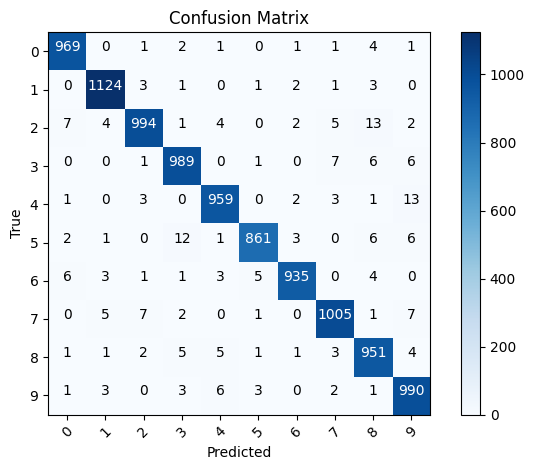

In [ ]:
# 교수님 답!

import matplotlib.pyplot as plt
import numpy as np                       # 배열 및 수치 계산
from sklearn.metrics import confusion_matrix  # 혼동 행렬 함수
import itertools                         # 반복 가능한 객체를 다루는 유틸리티

# 혼동 행렬을 시각화하는 함수 정의
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
  plt.imshow(cm, cmap=plt.cm.Blues)  # 혼동 행렬을 컬러 이미지로 표시
  plt.title(title)                   # 제목 설정
  plt.colorbar()                     # 색상 기준 바 추가

  # X축과 Y축에 클래스 이름(숫자)을 표시하기 위한 위치 인덱스
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  # 셀 내부에 정수 형태의 텍스트로 각 값을 표시
  fmt = 'd'                          # 숫자 포맷 (정수형)
  thresh = cm.max() / 2.0           # 색상에 따라 텍스트 색상을 결정하기 위한 임계값
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  # 모든 셀 순회
    plt.text(j, i, format(cm[i, j], fmt),       # 텍스트를 셀 중앙에 배치
             ha="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.tight_layout()
  plt.show()

# 결과가 1개씩 (train 6만, test 1만이었음)
a_preds = []    # 모델이 예측한 결과를 저장할 리스트
a_labels = []   # 실제 라벨(정답)을 저장할 리스트

# 모델을 평가 모드로 전환
model.eval()

# 메모리 사용량과 연산 속도 최적화
with torch.no_grad():
  for inputs, labels in test_loader:  # test_loader는 배치 단위로 입력과 정답을 제공
    inputs = inputs.view(-1, 784)     # 28x28 이미지를 1차원 벡터(784차원)로 변환
    outputs = model(inputs)           # 모델을 통해 예측 결과 얻음
    _, preds = torch.max(outputs, 1)  # 가장 높은 확률을 갖는 클래스 인덱스를 예측값으로 선택

    # GPU 연산일 경우 numpy로 바꾸기 위해 CPU로 옮긴 후 리스트에 저장
    a_preds.extend(preds.cpu().numpy())    # 예측값 리스트에 추가
    a_labels.extend(labels.cpu().numpy())  # 실제 정답 라벨 리스트에 추가

# 실제값과 예측값을 기반으로 혼동 행렬 생성 (10x10 매트릭스)
cm = confusion_matrix(a_labels, a_preds)

# 생성한 혼동 행렬을 시각화 (클래스는 0~9 숫자)
plot_confusion_matrix(cm, list(range(10)))

